<a href="https://colab.research.google.com/github/garotola/MonitoriaIA/blob/master/T%C3%A9cnicas%20de%20Aprendizagem/PALAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
years = [2021, 2022, 2023]
months = ['01', '02', '03', '04','05','06', '07','08','09','10','11','12']
dfs = []

for year in years:
  for month in months :
    path = '/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_'+ str(year) + '_' + str(month) + '.csv'
    print(path)
    dfs.append(pd.read_csv(path))


/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_01.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_02.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_03.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_04.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_05.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_06.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_07.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_08.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_09.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_10.csv
/content/drive/My Drive/MONITORIA/ANALISE DE DADOS/PALAS/dados/PALAS_OPERACOES_2021_11.csv

In [ ]:
# Concatenando todos df existentes
df = pd.DataFrame()
for d in dfs:
  df = pd.concat([df, d], ignore_index=True)

In [ ]:
df.columns

Index(['Checksum Id Operacao', 'Data do Inicio', 'Data da Deflagracao',
       'Tipo de Operacao', 'Area', 'Sigla Unidade Federativa',
       'Sigla Unidade Institucional', 'Atuacao em Territorio Indigena',
       'Atuacao em Territorio de Fronteira', 'Qtd Prisao em Flagrante',
       'Qtd Prisao Preventiva', 'Qtd Prisao Temporaria',
       'Qtd Mandado de Busca e Apreesao', 'Qtd Valores Apreendidos',
       'Qtd Valores Apreendidos i11', 'Qtd Valores Descapitalizados',
       'Qtd Prejuizos Causados a Uniao', 'Proib Ausentar Comarca',
       'Proib Acesso ou Freq', 'Comparecimento Juizo', 'Qtd Fianca',
       'Qtd Internacao Prov', 'Proib Contato', 'Mand Jud Caut Assec',
       'Recol Domic Noturno', 'Susp Ex Func Pub A E', 'Monit Eletronica',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Id Operacao'],
      dtype='object')

In [ ]:
df.head(3)

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica,Unnamed: 27,Unnamed: 28,Unnamed: 29,Id Operacao
0,942221fdfc274d9fdcb0f23f818d49ff,01/01/2021,31/01/2021,Operacao Simples,Tr�fico de Drogas ...,MS,DPF/PPA/MS ...,Nao,Paraguai ...,0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
1,b782d154d6dc815ec4773c38d8b055d3,01/01/2021,31/01/2021,Operacao Simples,Crimes Fazend�rios ...,MS,DPF/DRS/MS ...,Nao,Paraguai ...,0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,048bc561e4298fd42343fcd5fa0384f7,01/01/2021,31/01/2021,Operacao Simples,Crimes Fazend�rios ...,MS,DPF/DRS/MS ...,Nao,Paraguai ...,0,...,0,0,0,0,0,0,0.0,NaN,NaN,NaN


In [ ]:
for area in df['Area'].unique():
  df['Area'] = df['Area'].replace(area, area.rstrip())

for territorio in df['Atuacao em Territorio de Fronteira'].unique():
  df['Atuacao em Territorio de Fronteira'] = df['Atuacao em Territorio de Fronteira'].replace(territorio, territorio.rstrip())

for sigla in df['Sigla Unidade Institucional'].unique():
  df['Sigla Unidade Institucional'] = df['Sigla Unidade Institucional'].replace(sigla, sigla.rstrip())

In [ ]:
for column in df.columns:
  print(column, ' : ',df[column].unique())

Checksum Id Operacao  :  ['942221fdfc274d9fdcb0f23f818d49ff' 'b782d154d6dc815ec4773c38d8b055d3'
 '048bc561e4298fd42343fcd5fa0384f7' ... '4aaac55b37f3522763699c33a10d7f9a'
 '3d8858b9b87e533499f4f3cf562aba81' 'f8be22b5f7a9c77c22686ce463e21b77']
Data do Inicio  :  ['01/01/2021' '31/01/2021' '09/02/2021' ... '17/01/2024' '13/01/2024'
 '02/12/2023']
Data da Deflagracao  :  ['31/01/2021' '30/01/2021' '29/01/2021' ... '04/12/2023' '03/12/2023'
 '02/12/2023']
Tipo de Operacao  :  ['Operacao Simples ' 'Operacao de Apoio' 'Operacao Especial'
 'Operacao Comum   ']
Area  :  ['Tr�fico de Drogas' 'Crimes Fazend�rios'
 'Crimes Ambientais e Contra o Patrim�nio Cultural'
 'Crimes Contra o Patrim�nio' 'Crimes de Corrup��o' 'Crimes Eleitorais'
 'Crimes Previdenci�rios' 'Crimes Contra Direitos Humanos'
 'Crimes de �dio e Pornografia Infantil' 'Crimes Financeiros'
 'Assuntos Internos' 'Fraudes Banc�rias' 'Tr�fico de Armas'
 'Crimes da Alta Tecnologia']
Sigla Unidade Federativa  :  ['MS' 'MT' 'PE' 'PR' 'PA'

In [ ]:
df['Qtd Valores Apreendidos'] = df['Qtd Valores Apreendidos'].fillna('R$0')
df['Proib Ausentar Comarca'] = df['Proib Ausentar Comarca'].fillna('R$0')
df['Qtd Prejuizos Causados a Uniao'] = df['Qtd Prejuizos Causados a Uniao'].fillna('R$0')
df['Qtd Valores Apreendidos i11'] = df['Qtd Valores Apreendidos i11'].fillna('R$0')
df['Qtd Valores Descapitalizados'] = df['Qtd Valores Descapitalizados'].fillna('R$0')
df['Proib Acesso ou Freq'] = df['Proib Acesso ou Freq'].fillna('R$0')

In [ ]:
mapeamento_area = {
    'Tr�fico de Drogas': 'Tráfico de Drogas',
    'Crimes Fazend�rios': 'Crimes Fazendários',
    'Crimes Ambientais e Contra o Patrim�nio Cultural': 'Crimes Ambientais e Contra o Patrimônio Cultural',
    'Crimes Contra o Patrim�nio': 'Crimes Contra o Patrimônio',
    'Crimes de Corrup��o': 'Crimes de Corrupção',
    'Crimes Eleitorais': 'Crimes Eleitorais',
    'Crimes Previdenci�rios': 'Crimes Previdenciários',
    'Crimes Contra Direitos Humanos': 'Crimes Contra Direitos Humanos',
    'Crimes de �dio e Pornografia Infantil': 'Crimes de Ódio e Pornografia Infantil',
    'Crimes Financeiros': 'Crimes Financeiros',
    'Assuntos Internos': 'Assuntos Internos',
    'Fraudes Banc�rias': 'Fraudes Bancárias',
    'Tr�fico de Armas': 'Tráfico de Armas'
}

mapeamento_fronteira = {
    'Col�mbia': 'Colômbia',
    'Bol�via': 'Bolívia'
}

mapeamento_institucional ={
    'FOR�A TAREFA/PR' : 'FORÇA TAREFA/PR'
}

# Substitua os valores usando o método replace()
df['Area'] = df['Area'].replace(mapeamento_area)
df['Atuacao em Territorio de Fronteira'] = df['Atuacao em Territorio de Fronteira'].replace(mapeamento_fronteira)
df['Sigla Unidade Institucional'] = df['Sigla Unidade Institucional'].replace(mapeamento_institucional)

In [ ]:
df['Atuacao em Territorio de Fronteira'].unique()

array(['Paraguai', '', 'Venezuela', 'Guiana', 'Colômbia',
       'Guiana Francesa', 'Argentina', 'Peru', 'Uruguai', 'Bolívia',
       'Suriname'], dtype=object)

In [ ]:
df['Sigla Unidade Federativa'].unique()

array(['MS', 'MT', 'PE', 'PR', 'PA', 'RS', 'SP', 'BA', 'RR', 'AC', 'RJ',
       'MG', 'RN', 'SE', 'CE', 'TO', 'DF', 'PB', 'SC', 'AM', 'RO', 'AP',
       'PI', 'ES', 'GO', 'MA', 'AL'], dtype=object)

In [ ]:
df = df.drop(columns=['Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Id Operacao'])


<Axes: title={'center': 'Area de Atuação'}>

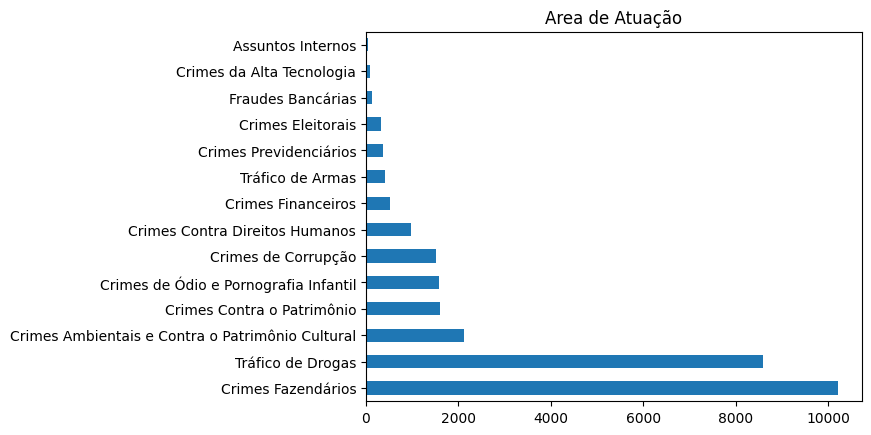

In [ ]:
area = df['Area'].value_counts()
area.plot(kind='barh', title='Area de Atuação')

In [ ]:
df_pa = df.loc[df['Sigla Unidade Federativa'] == 'PA']

<ipython-input-184-136462ba7607>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


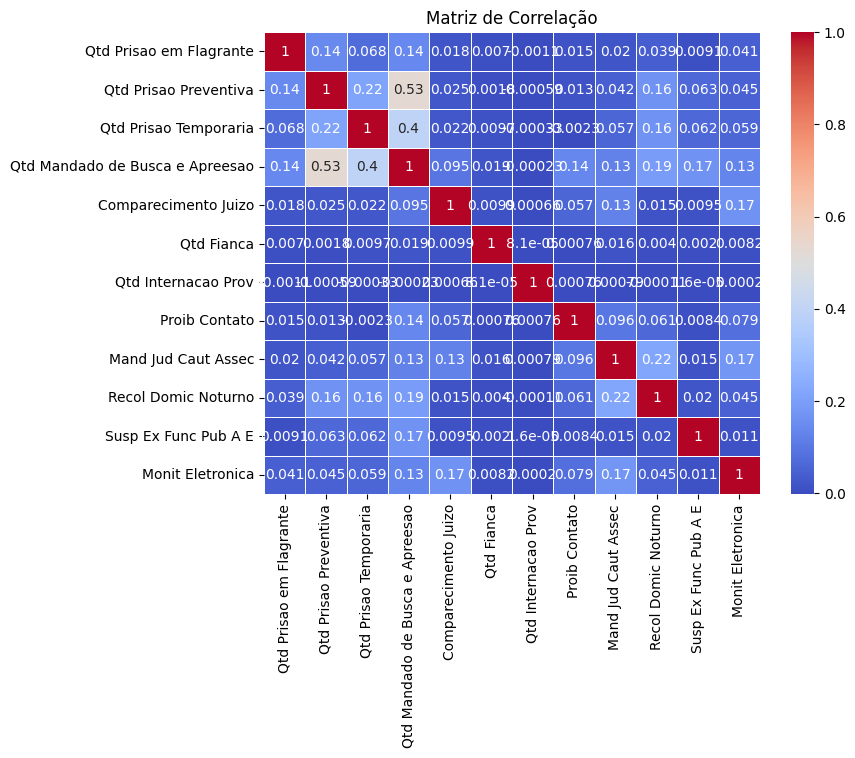

In [ ]:
import seaborn as sns
correlacao = df.corr()

# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
df_pa.describe(include='all')

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Proib Ausentar Comarca,Proib Acesso ou Freq,Comparecimento Juizo,Qtd Fianca,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica
count,900,927,927,927,927,927,927,927,927,927.000000,...,927,927,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
unique,900,488,475,4,14,1,7,2,3,NaN,...,30,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8edda0ffdcc31b32b8e0cd18818f7fac,30/10/2022,30/10/2022,Operacao Simples,Crimes Ambientais e Contra o Patrimônio Cultural,PA,SR/PF/PA,Nao,,NaN,...,R$0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,14,14,464,297,927,345,880,923,NaN,...,529,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.373247,...,NaN,NaN,0.005394,0.016181,0.009709,0.008630,0.018339,0.007551,0.020496,0.040992
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729549,...,NaN,NaN,0.073283,0.276427,0.176701,0.179786,0.358013,0.118245,0.247254,0.915691
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Quantidade de Valores Nulos em cada coluna
df_pa.isnull().sum()

Checksum Id Operacao                  27
Data do Inicio                         0
Data da Deflagracao                    0
Tipo de Operacao                       0
Area                                   0
Sigla Unidade Federativa               0
Sigla Unidade Institucional            0
Atuacao em Territorio Indigena         0
Atuacao em Territorio de Fronteira     0
Qtd Prisao em Flagrante                0
Qtd Prisao Preventiva                  0
Qtd Prisao Temporaria                  0
Qtd Mandado de Busca e Apreesao        0
Qtd Valores Apreendidos                0
Qtd Valores Apreendidos i11            0
Qtd Valores Descapitalizados           0
Qtd Prejuizos Causados a Uniao         0
Proib Ausentar Comarca                 0
Proib Acesso ou Freq                   0
Comparecimento Juizo                   0
Qtd Fianca                             0
Qtd Internacao Prov                    0
Proib Contato                          0
Mand Jud Caut Assec                    0
Recol Domic Notu

In [ ]:
df_pa.head(3)

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Proib Ausentar Comarca,Proib Acesso ou Freq,Comparecimento Juizo,Qtd Fianca,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica
15,8edda0ffdcc31b32b8e0cd18818f7fac,31/01/2021,31/01/2021,Operacao de Apoio,Crimes Ambientais e Contra o Patrimônio Cultural,PA,SR/PF/PA,Nao,,0,...,R$0,0.0,0,0,0,0,0,0,0,0
16,11787a1b33a098a68d5c4242652c81c4,31/01/2021,31/01/2021,Operacao de Apoio,Crimes Ambientais e Contra o Patrimônio Cultural,PA,DPF/SNM/PA,Nao,,0,...,R$0,0.0,0,0,0,0,0,0,0,0
44,29a11e203e67478dc15b92a9b4f0ccfb,29/01/2021,29/01/2021,Operacao de Apoio,Crimes Previdenciários,PA,DPF/RDO/PA,Nao,,0,...,R$0,0.0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Area de Atuação'}>

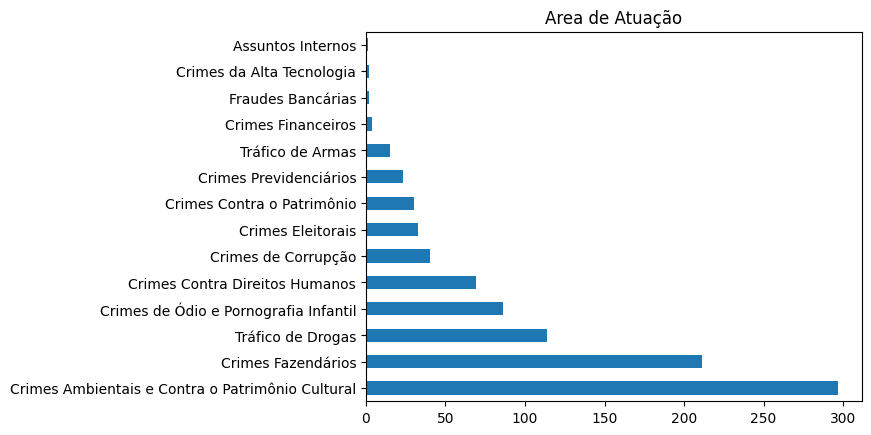

In [ ]:
# Visualização de Areas de Atuação da Investigação Policial
area = df_pa['Area'].value_counts()
area.plot(kind='barh', title='Area de Atuação')

In [ ]:
df_pa_crime_ambiental = df_pa[df_pa['Area']=='Crimes Ambientais e Contra o Patrimônio Cultural']
df_crime_ambiental = df[df['Area']=='Crimes Ambientais e Contra o Patrimônio Cultural']

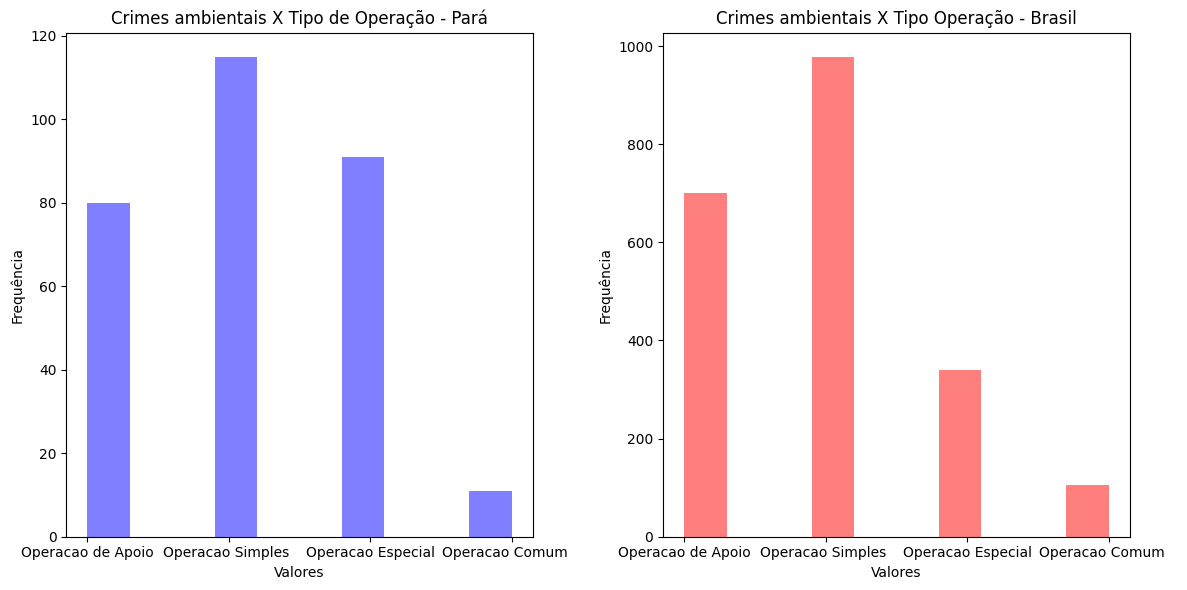

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotar histograma 1
axs[0].hist(df_pa_crime_ambiental['Tipo de Operacao'], bins=10, color='blue', alpha=0.5)
axs[0].set_title('Crimes ambientais X Tipo de Operação - Pará')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frequência')

# Plotar histograma 2
axs[1].hist(df_crime_ambiental['Tipo de Operacao'], bins=10, color='red', alpha=0.5)
axs[1].set_title('Crimes ambientais X Tipo Operação - Brasil')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frequência')

# Ajustar layout
plt.tight_layout()

# Mostrar os histogramas
plt.show()

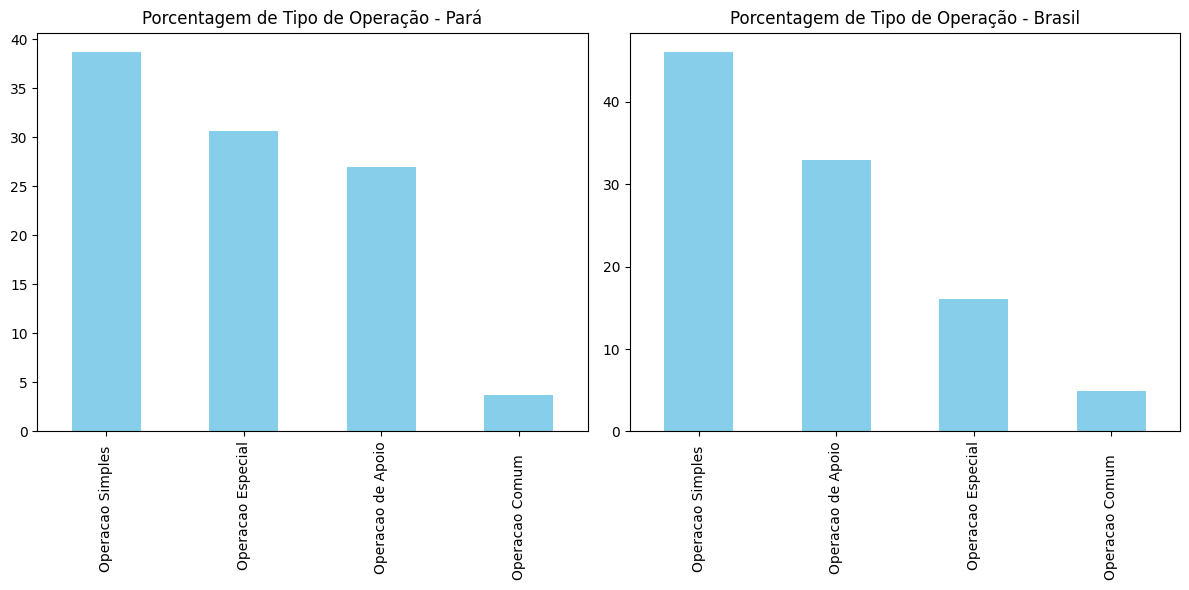

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
percentual_pa = df_pa_crime_ambiental['Tipo de Operacao'].value_counts(normalize=True) * 100
percentual_br = df_crime_ambiental['Tipo de Operacao'].value_counts(normalize=True) * 100

# Grafico para mostrar tipo de operação para a area de Crimes ambientais no Para
percentual_pa.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Porcentagem de Tipo de Operação - Pará')
axs[0].set_ylabel('')  # Remover o rótulo do eixo y

# Grafico para mostrar tipo de operação para a area de Crimes ambientais no Brasil
percentual_br.plot(kind='bar', ax=axs[1], color = 'skyblue')
axs[1].set_title('Porcentagem de Tipo de Operação - Brasil')
axs[1].set_ylabel('')  # Remover o rótulo do eixo y

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [ ]:
df_crime_ambiental['Atuacao em Territorio Indigena'].value_counts(normalize=True) * 100

Nao    92.793217
Sim     7.206783
Name: Atuacao em Territorio Indigena, dtype: float64

In [ ]:
df_pa_crime_ambiental['Atuacao em Territorio Indigena'].value_counts(normalize=True) * 100

Nao    86.531987
Sim    13.468013
Name: Atuacao em Territorio Indigena, dtype: float64

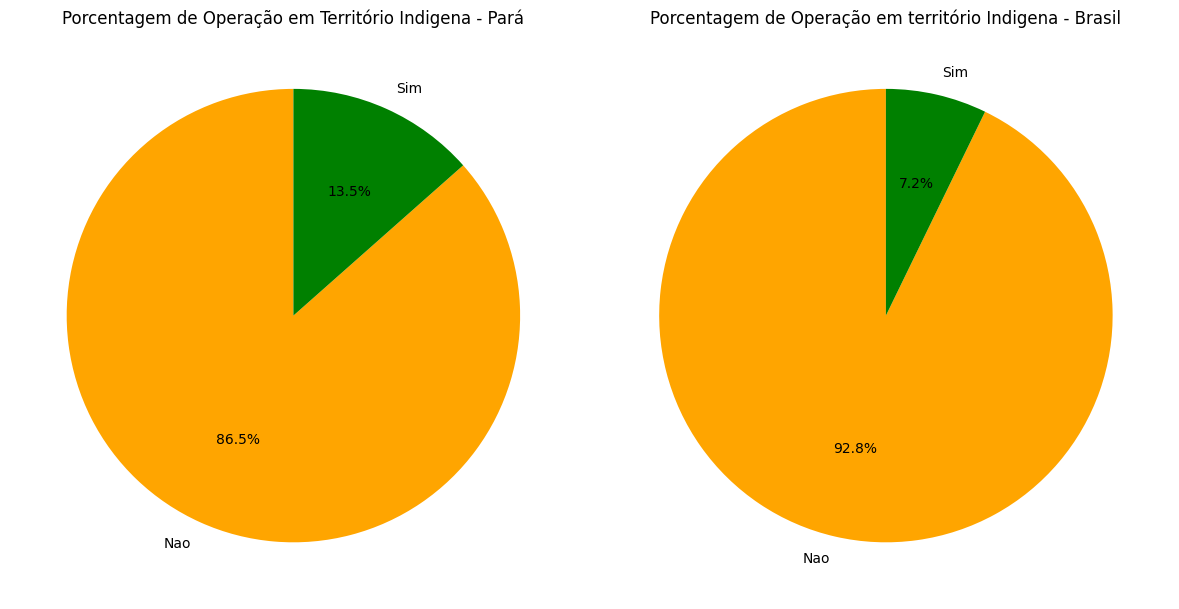

In [ ]:
# Territorio Indigena
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
percentual_pa = df_pa_crime_ambiental['Atuacao em Territorio Indigena'].value_counts(normalize=True) * 100
percentual_br = df_crime_ambiental['Atuacao em Territorio Indigena'].value_counts(normalize=True) * 100

# Grafico para mostrar tipo de operação para a area de Crimes ambientais no Para
percentual_pa.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'green'],ax=axs[0])
axs[0].set_title('Porcentagem de Operação em Território Indigena - Pará')
axs[0].set_ylabel('')  # Remover o rótulo do eixo y

# Grafico para mostrar tipo de operação para a area de Crimes ambientais no Brasil
percentual_br.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'green'],ax=axs[1])
axs[1].set_title('Porcentagem de Operação em território Indigena - Brasil')
axs[1].set_ylabel('')  # Remover o rótulo do eixo y

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()